In [5]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import time
import matplotlib.pyplot as plt

# Load train and test CSV files

# uploaded = files.upload()
train_data = pd.read_csv('/Users/auroraa/Downloads/train.csv')

test_data = pd.read_csv('/Users/auroraa/Downloads/test.csv')


# Drop id column from the training dataset
train_data = train_data.drop(['id'], axis=1)

# Separate features (X) and target (y) from training data
X_train = train_data.drop('Exited', axis=1)
y_train = train_data['Exited']

In [6]:
# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a Pipeline object that applies the standard scaler to the numerical columns
# and the one hot encoder to the categorical columns; then applies the knn classifier (k=5).
# The model should match the given output of this cell.
# model = TODO
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Create a pipeline that includes preprocessing and the KNN classifier
model = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Train the model on the training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Surname', 'Geography', 'Gender'], dtype='object'))])),
                ('knn', KNeighborsClassifier())])

Validation Accuracy: 0.7552 with n_neighbors=1
Time taken: 8.17 seconds, Seconds per sample: 0.000545 seconds
Validation Accuracy: 0.8187 with n_neighbors=2
Time taken: 9.35 seconds, Seconds per sample: 0.000623 seconds
Validation Accuracy: 0.8482 with n_neighbors=3
Time taken: 11.03 seconds, Seconds per sample: 0.000735 seconds
Validation Accuracy: 0.8648 with n_neighbors=4
Time taken: 7.84 seconds, Seconds per sample: 0.000523 seconds
Validation Accuracy: 0.8741 with n_neighbors=5
Time taken: 8.25 seconds, Seconds per sample: 0.000550 seconds
Validation Accuracy: 0.8806 with n_neighbors=6
Time taken: 8.49 seconds, Seconds per sample: 0.000566 seconds
Validation Accuracy: 0.8854 with n_neighbors=7
Time taken: 8.48 seconds, Seconds per sample: 0.000565 seconds
Validation Accuracy: 0.8906 with n_neighbors=8
Time taken: 9.19 seconds, Seconds per sample: 0.000612 seconds
Validation Accuracy: 0.8929 with n_neighbors=9
Time taken: 8.72 seconds, Seconds per sample: 0.000581 seconds
Validatio

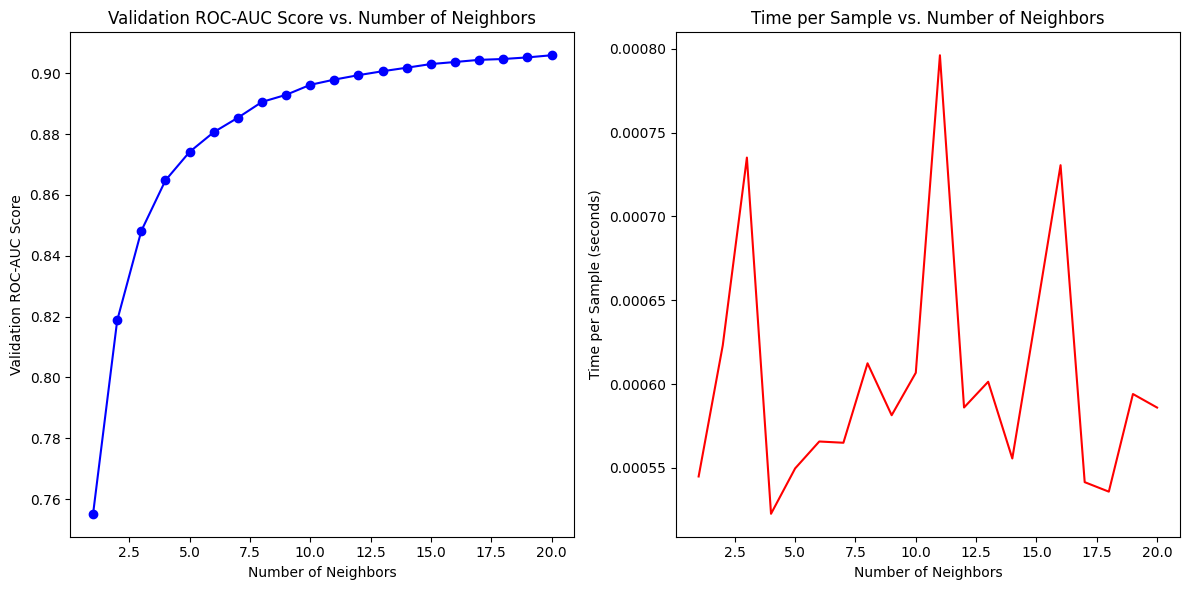

Best n_neighbors: 20 with Validation Accuracy: 0.9059


In [7]:
# Define the hyperparameter range for n_neighbors
n_neighbors_values = range(1, 21)  # Testing for neighbors from 1 to 20

# Store results
n_neighbors_list = []
auc_scores = []
times_per_sample = []

# Perform cross-validation over different values of n_neighbors
for n_neighbors in n_neighbors_values:
    # Same as previous code block.
    # model = TODO
    model = Pipeline([
    ('preprocessor', preprocessor),
      ('knn', KNeighborsClassifier(n_neighbors=n_neighbors))
    ])
    # Measure the time taken for cross-validation
    start_time = time.time()

    # Perform cross-validation and calculate mean validation AUC score.
    # Perform 5-fold cross-validation using the cross_val_score function.
    #
    # mean_validation_score = TODO
    mean_validation_score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    # Calculate elapsed time and seconds per sample
    elapsed_time = time.time() - start_time
    seconds_per_sample = elapsed_time / len(X_train)

    # Store results for plotting
    n_neighbors_list.append(n_neighbors)
    auc_scores.append(mean_validation_score)
    times_per_sample.append(seconds_per_sample)

    # Print out the validation accuracy, the value of n_neighbors, and the time per sample
    print(f'Validation Accuracy: {mean_validation_score:.4f} with n_neighbors={n_neighbors}')
    print(f'Time taken: {elapsed_time:.2f} seconds, Seconds per sample: {seconds_per_sample:.6f} seconds')

# Plotting results
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Left plot: AUC score vs number of neighbors
axs[0].plot(n_neighbors_list, auc_scores, marker='o', linestyle='-', color='b')
axs[0].set_xlabel('Number of Neighbors')
axs[0].set_ylabel('Validation ROC-AUC Score')
axs[0].set_title('Validation ROC-AUC Score vs. Number of Neighbors')

# Right plot: Time per sample vs number of neighbors
axs[1].plot(n_neighbors_list, times_per_sample, color='r')
axs[1].set_xlabel('Number of Neighbors')
axs[1].set_ylabel('Time per Sample (seconds)')
axs[1].set_title('Time per Sample vs. Number of Neighbors')

plt.tight_layout()
plt.show()

# Output the best hyperparameter
best_n_neighbors = n_neighbors_list[np.argmax(auc_scores)]
best_score = np.max(auc_scores)
print(f'Best n_neighbors: {best_n_neighbors} with Validation Accuracy: {best_score:.4f}')


In [9]:
# Create a model using the optimal k value
# model = TODO
model = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=best_n_neighbors))
])
# Train the model on the training data
model.fit(X_train, y_train)

# For the test data, we also drop unnecessary columns but keep 'id' for the final submission
X_test = test_data.drop(['id'], axis=1)
test_ids = test_data['id']

# Make prediction on test data
y_pred = model.predict_proba(X_test)[:,-1]

# Create the submission DataFrame
submission = pd.DataFrame({'id': test_ids, 'smoking': y_pred})

submission.to_csv('/Users/auroraa/Downloads/submission.csv', index=False)

print("Submission file 'submission.csv' has been created!")

Submission file 'submission.csv' has been created!
